In [71]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import copy


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 10000
max_property = 0 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
initial_positions=[]
for x in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
    for y in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
        initial_positions.append(np.array([x, y])) 
initial_positions = np.array(initial_positions)
print(initial_positions)
#initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))
point = 922.3426
charge = 100
initial_particles.append(Particle(np.array([point,point]), charge))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[  0.   0.]
 [  0.  10.]
 [  0.  20.]
 ...
 [990. 970.]
 [990. 980.]
 [990. 990.]]


In [40]:
# direct Simulation
direct_particles = copy.deepcopy(initial_particles)
direct_simulation = Direct(box_size, direct_particles)
direct_simulation.run()
direct_simulation.plot_potential()

1000


KeyboardInterrupt: 

1
fine 7 [118, 118] [925.78125 925.78125]
[100, -534.7495032723265, -1429.7851562499998, -5097.179347272221, -20442.855930328362, -87454.45643368662, -389718.559473877]
2
coarse level:  6
coarse 6 [59, 59] [929.6875 929.6875]
[ 1.00000000e+02 -1.08717668e+03 -5.90976562e+03 -4.28330623e+04
 -3.49253297e+05 -3.03760031e+06 -2.75200684e+07]
coarse level:  5
coarse 5 [29, 29] [921.875 921.875]
[ 1.00000000e+02 -2.19203102e+03 -2.40250000e+04 -3.51090302e+05
 -5.77200625e+06 -1.01219334e+08 -1.84896600e+09]
coarse level:  4
coarse 4 [14, 14] [906.25 906.25]
[ 1.00000000e+02 -4.40173971e+03 -9.68765625e+04 -2.84283608e+06
 -9.38506836e+07 -3.30485025e+09 -1.21225755e+11]
coarse level:  3
coarse 3 [7, 7] [937.5 937.5]
[ 1.00000000e+02 -8.82115710e+03 -3.89064062e+05 -2.28799681e+07
 -1.51370845e+09 -1.06821280e+11 -7.85239411e+12]
coarse level:  2
coarse 2 [3, 3] [875. 875.]
[ 1.00000000e+02 -1.76599919e+04 -1.55937656e+06 -1.83590516e+08
 -2.43165526e+10 -3.43544097e+12 -5.05582164e+14]
coa

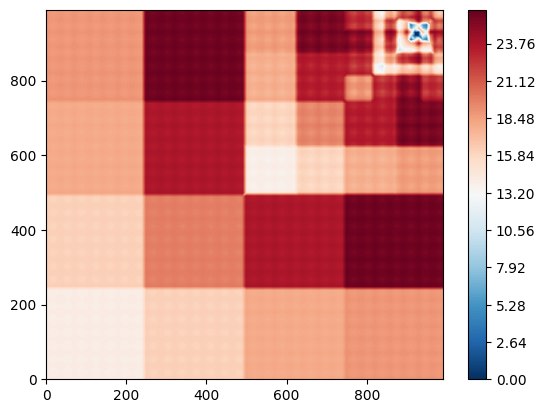

In [72]:
# FMM Simulation
precision = 40
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, precision, fmm_particles)
fmm_simulation.run()
fmm_simulation.plot_potential()

#initial_particles.append(Particle([box_size/2, box_size/2], 100))
#n_particles += 1



# analytic_particles = analytic_simulation.particles
# test_particles = point_test.particles
# for i, analytic_particle in enumerate(analytic_particles):
#     if abs(analytic_particle.complex_position - test_meshbox.complex_centre) > r:
#         analytic_particle.total_potential -= test_particles[i].total_potential
#     else:
#         analytic_particle.total_potential = np.infty
# analytic_simulation.plot_potential()

plt.show()

In [73]:
print(fmm_simulation.mesh.meshboxes[1][1][1].le_coeffs)

[0. 0. 0. 0. 0. 0. 0.]


/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Analytic_Classes.py:13: RuntimeWarning: divide by zero encountered in log
  particle.total_potential = -self.property * np.log(abs(particle.complex_position - self.complex_position))


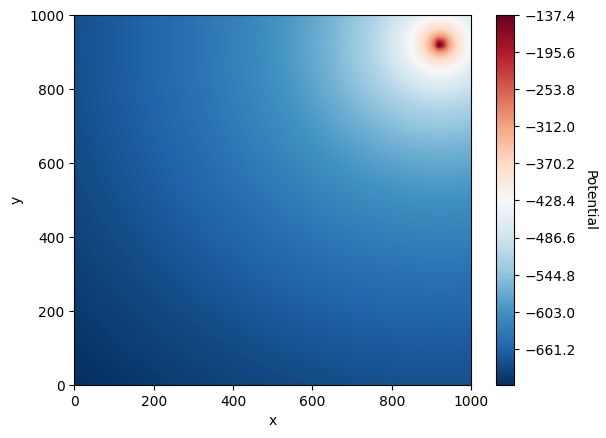

In [74]:
analytic_simulation = SingleParticle([point, point], charge, box_size)
analytic_simulation.plot_potential()
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation.evaluate_particle_potentials(analytic_particles)

320.0


Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


0.0


ValueError: z array must not contain non-finite values within the triangulation

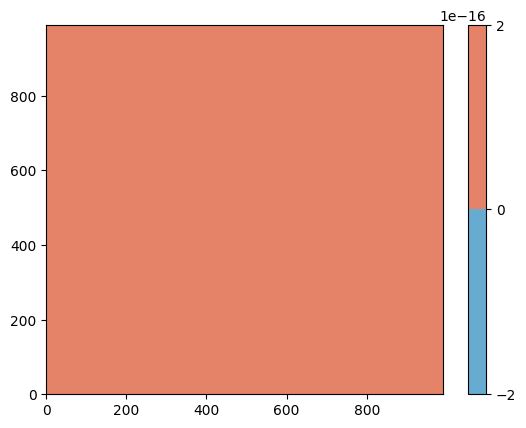

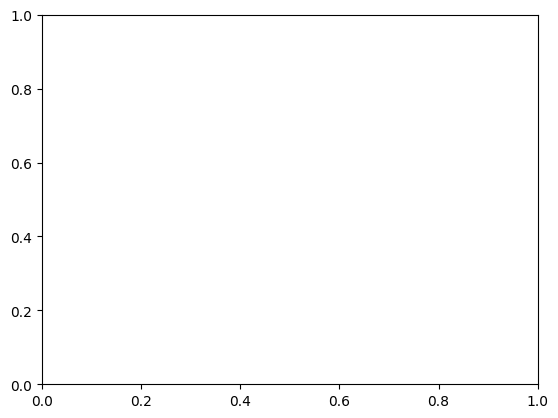

In [76]:
test_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
r = (box_size / int(np.sqrt(n_particles))) * (2**(test_meshbox.mesh.n_levels-test_meshbox.level))#*3*np.sqrt(2)
print(r)
point_test = PointTesting(initial_particles, test_meshbox, r)
point_test.test_mpe()
point_test.plot()
point_test.plot_difference(analytic_particles)